Filtered Rules:
      antecedents consequents  antecedent support  consequent support  \
1           (0.9)       (0.0)            0.107023            1.000000   
2           (0.0)       (1.0)            1.000000            0.966555   
3           (1.0)       (0.0)            0.966555            1.000000   
5           (1.1)       (0.0)            0.107023            1.000000   
7          (25.0)       (0.0)            0.120401            1.000000   
..            ...         ...                 ...                 ...   
118  (137.0, 1.0)       (0.0)            0.120401            1.000000   
121  (0.0, 140.0)       (1.0)            0.120401            0.966555   
122  (1.0, 140.0)       (0.0)            0.120401            1.000000   
125       (140.0)  (0.0, 1.0)            0.120401            0.966555   
126  (1.0, 582.0)       (0.0)            0.150502            1.000000   

      support  confidence      lift  leverage  conviction  zhangs_metric  
1    0.107023    1.000000  1.000

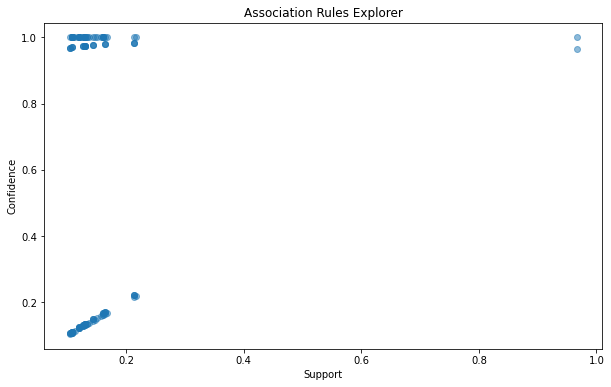

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('E:heart_failure_clinical_records_dataset.csv')


# Convert the dataset into a transactional format
te = TransactionEncoder()
te_ary = te.fit(data.values).transform(data.values)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Perform association rule mining using Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Apply association rule filters (example: filtering by confidence)
filtered_rules = rules[rules['confidence'] > 0.8]

# Display the filtered rules
print("Filtered Rules:")
print(filtered_rules)

# Association Rules Explorer
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Explorer')
plt.show()


In [ ]:
If any preprocessing steps are required on the dataset, you can perform them at this stage.
The dataset is converted into a transactional format using the TransactionEncoder class from mlxtend.preprocessing.
It converts the dataset into a binary matrix format where each row represents a transaction and each column represents an item.
The Apriori algorithm is applied to the transactional dataset using the apriori function from mlxtend.frequent_patterns. 
The min_support parameter specifies the minimum support threshold for an itemset to be considered frequent, 
and use_colnames=True ensures that the item names are used in the resulting DataFrame.
Association rules are generated from the frequent itemsets using the association_rules function from mlxtend.frequent_patterns.
The metric parameter is set to 'lift', and the min_threshold parameter is set to 1, 
indicating that only rules with a lift value greater than 1 will be generated.
Association rule filters can be applied to the generated rules based on different metrics. 
In this code, the confidence filter is applied by selecting only the rules with a confidence greater than 0.8.
The filtered rules are displayed using print().
The Association Rules Explorer is visualized using a scatter plot. 
The plt.scatter() function is used to create a scatter plot of the association rules,
where the x-axis represents the support and the y-axis represents the confidence. 
The transparency of the points is set to 0.5 using alpha=0.5 to indicate overlapping points.
The x-axis label is set to 'Support', the y-axis label is set to 'Confidence', 
and the plot title is set to 'Association Rules Explorer'.
The scatter plot is displayed using plt.show().
The code allows you to mine association rules from the dataset using the Apriori algorithm 
and visualize the support-confidence relationship using the Association Rules Explorer. 
The filtered rules and the scatter plot provide insights into the frequent itemsets, association rules,
and their support-confidence characteristics.